In [1]:
!git config --global user.name "Fatom"

In [2]:
!git config --global user.email "zahraelamssane@gmail.com"

In [4]:
!git clone https://github.com/Zohrae/TPDL.git
%cd TPDL

Cloning into 'TPDL'...
/content/TPDL


In [7]:
!cp "/content/drive/MyDrive/Colab Notebooks/TP DL.ipynb" .

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/TP DL.ipynb': No such file or directory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Génération d'un dataset binaire fictif
X, y = make_classification(
    n_samples=1000, n_features=20,
    n_informative=10, n_redundant=5,
    n_classes=2, random_state=42
)

# Division du dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Séparation validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Création du modèle
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

# Compilation du modèle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.5476 - loss: 0.6838 - val_accuracy: 0.8438 - val_loss: 0.5803
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.7268 - loss: 0.5768 - val_accuracy: 0.8687 - val_loss: 0.4629
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8415 - loss: 0.4599 - val_accuracy: 0.8938 - val_loss: 0.3321
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8736 - loss: 0.3741 - val_accuracy: 0.9062 - val_loss: 0.2562
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8849 - loss: 0.3119 - val_accuracy: 0.9187 - val_loss: 0.2228
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8969 - loss: 0.2612 - val_accuracy: 0.9375 - val_loss: 0.1999
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9048 - loss: 0.2724 - val_accuracy: 0.9375 - val_loss: 0.1835
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9241 - loss: 0.2377 - val_accuracy: 0.

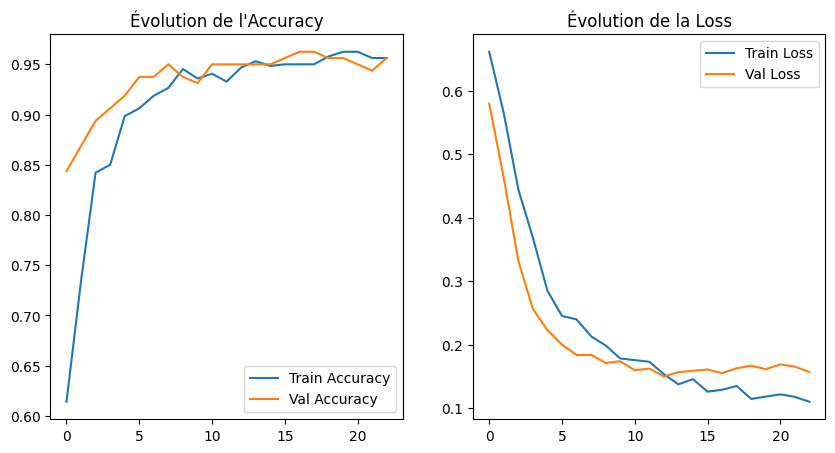

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Évolution de l'Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Évolution de la Loss")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Prédictions sur les données de test
y_pred = (model.predict(X_test) > 0.5).astype("int32")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")
print(f"AUC: {auc:.3f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Precision: 0.912
Recall: 0.949
F1-score: 0.930
AUC: 0.930


In [ ]:
model_no_dropout = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
